In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day37-handling-missing-categorical-data/train.csv"
df = pd.read_csv(url,usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [7]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<AxesSubplot:>

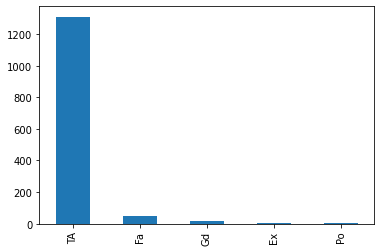

In [8]:
df['GarageQual'].value_counts().plot(kind='bar')

In [9]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

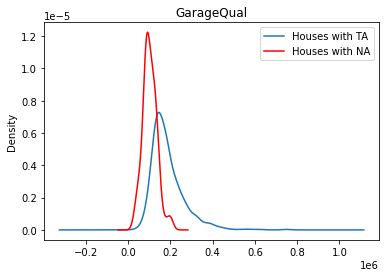

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

<AxesSubplot:>

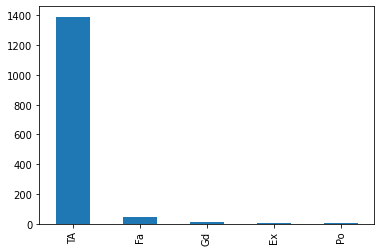

In [11]:
temp = df[df['GarageQual']=='TA']['SalePrice']

df['GarageQual'].fillna('TA', inplace=True)

df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

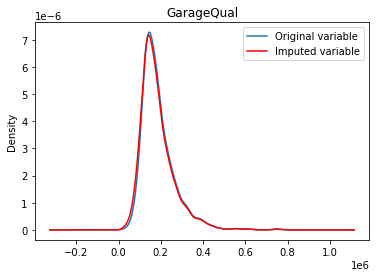

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

In [13]:
---

SyntaxError: invalid syntax (1947214667.py, line 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imputer = SimpleImputer(strategy='most_frequent')

In [17]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\PC1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [18]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)